## Context and goals:
Brazil had 24.092 dams in 2017 (this df, from 2018, has 17.604). The government is making an effort to control and label the dams according to low, medium and high risk, but there are two big problems: 1. the risk criteria demands several features that are hard to collect and measure; 2. the governemnt does not have enough regulatory institutions and qualified workers to visit all of them, collect information and label the risk manually.  
Therefore, this project goal will be pre-label as many dams as possible with the minimum amount of features as possible, so the government can focus on prioritize the inspection on the ones with higher risk.

in case of next step: predict accident, check https://spgeotecnia.pt/uploads/jgeot201413209.pdf

## To dos:

1. Drop columns (useless and too many nans)
2. Clean categorical data text
3. Transform it in dtype categorical
4. Find nulls

1. prepare categorical data (one-hot- enconding)
2. prepare numerical data (standard scaler)

1. explore feature reduction
2. explore models and find the best one

## Libraries and Dataframe

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

import copy

import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
pd.set_option('display.max_rows', 100)
df = pd.read_excel('SNISB 2018.xlsx', sheet_name='Cadastro')

## Explore 

In [8]:
len(df)

17604

In [9]:
df.columns

Index(['Codigo_barragem_SNISB', 'Codigo_barragem_Fiscalizador',
       'Autorizacao_Numero', 'Autorizacao_Data_emissao_publicacao',
       'Autorizacao_Data_validade', 'CNARH_Numero', 'Barragem_Nome',
       'Barragem_NomeSecundario', 'Barragem_Altura_AcimaBaseFundacao',
       'Barragem_Altura_AcimaNivelTerreno', 'Barragem_Capacidade',
       'Barragem_Principal_Tipo_material',
       'Barragem_Principal_Tipo_estrutural', 'Barragem_Principal_comprimento',
       'Empreendedor_Nome', 'Empreendedor_Sigla', 'Empreendedor_CNPJ',
       'Empreendedor_CPF', 'Empreendedor_endereco', 'Empreendedor _e-mail',
       'Empreendedor_telefone', 'Empreendedor_telefone alternativo',
       'Construcao_Data_Inicio', 'Construcao_Data_Fim', 'Uso_principal',
       'Uso_Complementar', 'Classe Residuo', 'Cursodagua_barrado',
       'Bacia_Hidrografica', 'Regiao_Hidrografica_CNRH',
       'UnidadeGestaoRecursosHidricos', 'Latitude_dec', 'Longitude_dec',
       'Datum', 'Barragem_UF', 'Barragem_Municipio', 

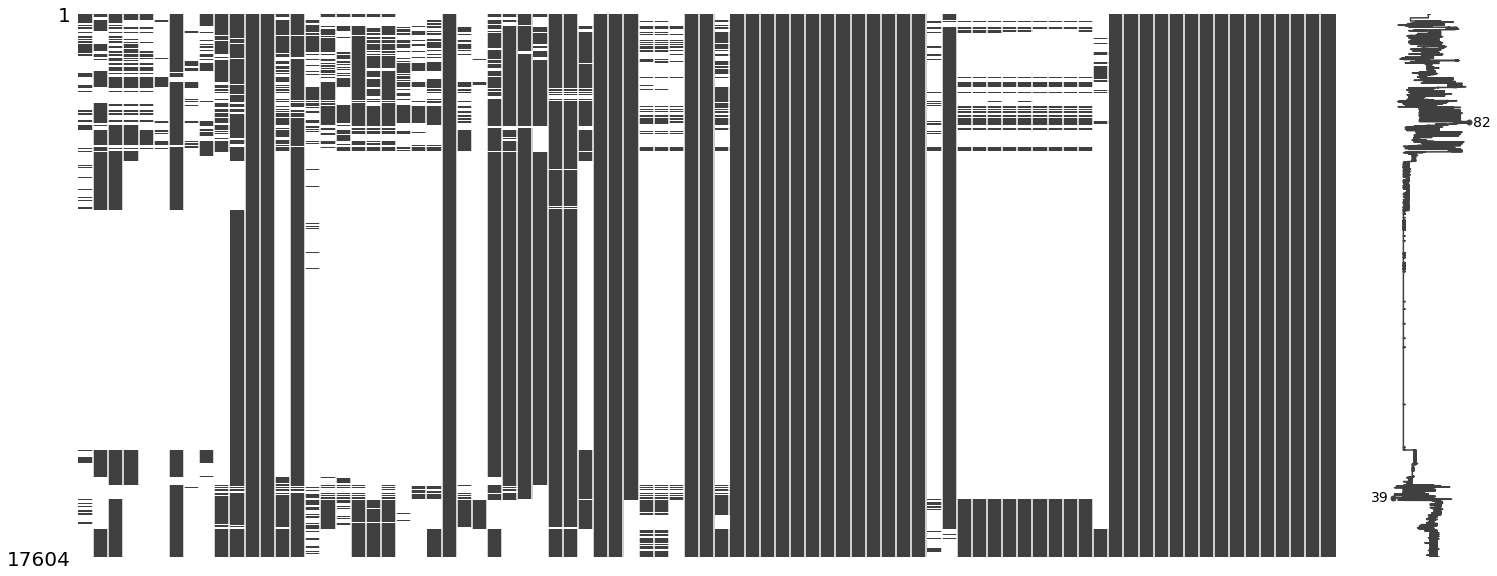

In [10]:
import missingno as msno
msno.matrix(df)

## drop columns
not necesseary features to execute machine learning
(name, code, owner name, business number, state, etc) or too many nans.

Age score would be very important, but there is a lot of nans.

In [11]:
df.dropna(subset=['Codigo_barragem_SNISB', 'Codigo_barragem_Fiscalizador',
       'Autorizacao_Numero', 'Autorizacao_Data_emissao_publicacao',
       'Autorizacao_Data_validade', 'CNARH_Numero', 'Barragem_Nome',
       'Barragem_NomeSecundario'], how='all', inplace = True)

In [12]:
#deleted because this is register info
df.drop(columns=['Codigo_barragem_SNISB', 'Codigo_barragem_Fiscalizador',
       'Autorizacao_Numero', 'Autorizacao_Data_emissao_publicacao',
       'Autorizacao_Data_validade', 'CNARH_Numero',
       'Barragem_NomeSecundario','Empreendedor_Nome',
                 'Empreendedor_Sigla', 'Empreendedor_CNPJ',
       'Empreendedor_CPF', 'Empreendedor_endereco', 'Empreendedor _e-mail',
       'Empreendedor_telefone', 'Empreendedor_telefone alternativo'], inplace=True)

In [13]:
#deleted because this is unnecessary info for machine learning
df.drop(columns=['Uso_Complementar','Regiao_Hidrografica_CNRH','Latitude_dec',
           'Longitude_dec','Dominio_Curso_Dagua','DataUltimaInspecao','TipoUltimaInspecao',
           'ComentariosObservacoes','Órgão fiscalizador','Barragem Outorgada?',
           'Tem informação de altura?','Tem informação de volume?','Tem informação de altura e volume?',
           'classificada quanto ao CRI?','classificada quanto ao DPA?','Houve alguma inspeção no período deste RSB?',
           'Cadastrada no SNISB?','N','sequência'], inplace=True)

In [14]:
#deleted because there are too many nulls when filtering by risk criteria
df.drop(columns=['Construcao_Data_Inicio','Barragem_Altura_AcimaBaseFundacao','Classe Residuo',
                'Barragem_nivel_de_perigo','DataUltimaFiscalização',
                'CRI - ∑ pontuação CT','CRI - ∑ pontuação EC', 'CRI - ∑ pontuação PSB','CRI - pontuação Confiabialidade das estruturas extravasoras',
                 'CRI - pontuação Confiabialidade das estruturas de adução','CRI - pontuação Percolação', 
                 'CRI - pontuação Deformações e recalques','CRI - pontuação Deterioração taludes', 'CRI - pontuação  Eclusa'], inplace=True)

In [15]:
#decide later if deleting or not
df.drop(columns=['Barragem_Classe','Barragem_Principal_Tipo_estrutural','VazaoProjeto_OrgaoExtravasor',
                 'ExtravasorControle','Barragem_autuada?', 
                 'Construcao_Data_Fim'],inplace = True)

In [16]:
#geographic info and other irrelevant info
df.drop(columns=['Cursodagua_barrado','Bacia_Hidrografica','UnidadeGestaoRecursosHidricos',
                 'Datum','Barragem_UF','Barragem_Municipio','Empreendedor Identificado?',
                'Houve alguma fiscalização no período deste RSB?'],inplace = True)

## Dtypes
organize categories and substitute each category for 'risk points' defined by National Policies for Dam Safety, law Nº 12.334. 

Points will make it easier to check correlations.

In [17]:
df.dtypes

Barragem_Nome                            object
Barragem_Altura_AcimaNivelTerreno       float64
Barragem_Capacidade                      object
Barragem_Principal_Tipo_material         object
Barragem_Principal_comprimento          float64
Uso_principal                            object
Barragem_Categoria_Risco                 object
Barragem_Dano_Potencial_Associado        object
TemPAE                                   object
TemPlanoSeguranca                        object
TemRevisaoPeriodica                      object
CriterioVazaoProjeto_OrgaoExtravasor     object
TemProjetoExecutivo                      object
TemProjetoComo construido                object
TemProjetoBasico                         object
TemProjetoConceitual                     object
TemEclusa                                object
Barragem_FasedeVida                      object
ReguladaPNSB                             object
Barragem Pública ou particular           object
Submetida à algum regulamento?          

In [18]:
# name | string (nothing changed)
df.Barragem_Nome = df.Barragem_Nome.astype(str)

In [19]:
# dam's high | numerical
df["Barragem_Altura_AcimaNivelTerreno"] = pd.to_numeric(df["Barragem_Altura_AcimaNivelTerreno"], errors='coerce')

In [20]:
# dam's capacity | numerical
df["Barragem_Capacidade"] = pd.to_numeric(df["Barragem_Capacidade"], errors='coerce')

In [21]:
# dam's material | text fixing
df['Barragem_Principal_Tipo_material'] = df['Barragem_Principal_Tipo_material'].str.lower()
df['Barragem_Principal_Tipo_material'] = df['Barragem_Principal_Tipo_material'].replace('terra ','terra')
df['Barragem_Principal_Tipo_material'] = df['Barragem_Principal_Tipo_material'].replace('alvenaria ','alvenaria')
df['Barragem_Principal_Tipo_material'] = df['Barragem_Principal_Tipo_material'].replace('sem informação', np.nan)
df['Barragem_Principal_Tipo_material'].isnull().sum() #10735 nulls

2953

In [22]:
# dam's material | Group by risk score:
two = ['alvenaria','concreto ciclópico','concreto compactado a rolo  (ccr)']
df['Barragem_Principal_Tipo_material'] = ['alvenaria ou concreto rolo ou ciclópico' if i in two 
                                          else i for i in df['Barragem_Principal_Tipo_material']]

three = ['terra','terra-enrocamento','enrocamento', 'rejeito','outro']
df['Barragem_Principal_Tipo_material'] = ['terra, enrocamento ou outros' if i in three 
                                        else i for i in df['Barragem_Principal_Tipo_material']]

In [23]:
# dam's material | transform in categorical - ordered:
df['Barragem_Principal_Tipo_material'] = df['Barragem_Principal_Tipo_material'].astype('category')
df['Barragem_Principal_Tipo_material'] = df['Barragem_Principal_Tipo_material'].cat.set_categories([
    'concreto convencional','alvenaria ou concreto rolo ou ciclópico','terra, enrocamento ou outros'], ordered=True)

In [24]:
labels = df['Barragem_Principal_Tipo_material'].cat.categories.tolist()
score = {k: v for k,v in zip(labels,[1,2,3])}
print(score)

df['material_score'] =  df['Barragem_Principal_Tipo_material'].map(score)
df['material_score'].value_counts()

{'concreto convencional': 1, 'alvenaria ou concreto rolo ou ciclópico': 2, 'terra, enrocamento ou outros': 3}


3    6140
1     507
2     216
Name: material_score, dtype: int64

In [25]:
#dam's main use
df['Uso_principal'] = df['Uso_principal'].str.lower()
df['Uso_principal'] = df['Uso_principal'].replace('sem informação', np.nan)
df['Uso_principal'].isnull().sum() #722 nulls

722

In [26]:
df['Uso_principal'].value_counts()
df['Uso_principal'] = df['Uso_principal'].astype('category')

In [30]:
'''#State
df['Barragem_UF'] = df['Barragem_UF'].str.upper()
df['Barragem_UF'].value_counts()
df['Barragem_UF'].isnull().sum()
df['Barragem_UF'] = df['Barragem_UF'].astype('category')'''

"#State\ndf['Barragem_UF'] = df['Barragem_UF'].str.upper()\ndf['Barragem_UF'].value_counts()\ndf['Barragem_UF'].isnull().sum()\ndf['Barragem_UF'] = df['Barragem_UF'].astype('category')"

In [31]:
#dam's risk category (the target). 
df['Barragem_Categoria_Risco'] = df['Barragem_Categoria_Risco'].str.lower()
df['Barragem_Categoria_Risco'] = df['Barragem_Categoria_Risco'].replace('médio ','médio')
df['Barragem_Categoria_Risco'] = df['Barragem_Categoria_Risco'].replace('baixo ','baixo')
df['Barragem_Categoria_Risco'] = df['Barragem_Categoria_Risco'].replace('não classificada', np.nan)
df['Barragem_Categoria_Risco'].value_counts().sum()
#df['Barragem_Categoria_Risco'].isnull().sum() #12518 nulls

5065

In [32]:
df['Barragem_Categoria_Risco'] = pd.Series(df['Barragem_Categoria_Risco'], dtype="category")
df['Barragem_Categoria_Risco'] = df['Barragem_Categoria_Risco'].cat.set_categories(['não se aplica','baixo','médio','alto'], ordered=True)

In [33]:
#dam's risk category (the target). Points are average of range defined by law.
labels = df['Barragem_Categoria_Risco'].cat.categories.tolist()
score = {k: v for k,v in zip(labels,[0,30,50,70])}
print(score)

df['risco_score'] =  df['Barragem_Categoria_Risco'].map(score)
df['risco_score'].value_counts()

{'não se aplica': 0, 'baixo': 30, 'médio': 50, 'alto': 70}


30    1798
70    1430
50    1003
0      834
Name: risco_score, dtype: int64

In [34]:
#potentially associated damage
#em função do potencial de perdas de vidas humanas e dos
#impactos econômicos, sociais e ambientais decorrentes da ruptura da barragem.
df['Barragem_Dano_Potencial_Associado'] = df['Barragem_Dano_Potencial_Associado'].str.lower()
df['Barragem_Dano_Potencial_Associado'] = df['Barragem_Dano_Potencial_Associado'].replace('médio ','médio')
df['Barragem_Dano_Potencial_Associado'] = df['Barragem_Dano_Potencial_Associado'].replace('baixo ','baixo')
df['Barragem_Dano_Potencial_Associado'] = df['Barragem_Dano_Potencial_Associado'].replace('não classificada', np.nan)
df['Barragem_Dano_Potencial_Associado'].unique()
df['Barragem_Dano_Potencial_Associado'].value_counts()
df['Barragem_Dano_Potencial_Associado'].isnull().sum() #11027 nulls

3260

In [35]:
df['Barragem_Dano_Potencial_Associado'] = pd.Series(df['Barragem_Dano_Potencial_Associado'], dtype="category")
df['Barragem_Dano_Potencial_Associado'] = df['Barragem_Dano_Potencial_Associado'].cat.set_categories(
    ['baixo','médio','alto'], ordered=True)


In [36]:
labels = df['Barragem_Dano_Potencial_Associado'].cat.categories.tolist()
score = {k: v for k,v in zip(labels,[7,14,21])}
print(score)

df['DPA_score'] =  df['Barragem_Dano_Potencial_Associado'].map(score)
df['DPA_score'].value_counts()

{'baixo': 7, 'médio': 14, 'alto': 21}


21    3286
7     2411
14     859
Name: DPA_score, dtype: int64

In [37]:
#have an emergency plan (yes / no / doesn't apply)
df['TemPAE'] = df['TemPAE'].str.lower()
df['TemPAE'] = df['TemPAE'].replace('não ','não')
df['TemPAE'] = df['TemPAE'].replace('nãose aplica','não se aplica')
df['TemPAE'] = df['TemPAE'].replace('sem informação',np.nan)
df['TemPAE'].value_counts()
#df['TemPAE'].isnull().sum() #11199 nulls

não              4603
sim              1088
não se aplica     714
Name: TemPAE, dtype: int64

In [38]:
df['TemPAE'] = pd.Series(df['TemPAE'], dtype="category")
df['TemPAE'] = df['TemPAE'].cat.set_categories(['não se aplica','sim','não'], ordered=True)

In [39]:
labels = df['TemPAE'].cat.categories.tolist()
score = {k: v for k,v in zip(labels,[0,1,5])}
print(score)

df['temPAE_score'] =  df['TemPAE'].map(score)
df['temPAE_score'].value_counts()

{'não se aplica': 0, 'sim': 1, 'não': 5}


5    4603
1    1088
0     714
Name: temPAE_score, dtype: int64

In [40]:
#have a security plan (yes / no / doesn't apply)
df['TemPlanoSeguranca'] = df['TemPlanoSeguranca'].str.lower()
df['TemPlanoSeguranca'] = df['TemPlanoSeguranca'].replace('sem informação',np.nan)
df['TemPlanoSeguranca'].value_counts()
df['TemPlanoSeguranca'].isnull().sum() #11140 nulls

3352

In [41]:
df['TemPlanoSeguranca'] = pd.Series(df['TemPlanoSeguranca'], dtype="category")
df['TemPlanoSeguranca'] = df['TemPlanoSeguranca'].cat.set_categories(['não se aplica','sim','não'], ordered=True)

In [42]:
labels = df['TemPlanoSeguranca'].cat.categories.tolist()
score = {k: v for k,v in zip(labels,[0,1,5])}
print(score)

df['temPS_score'] =  df['TemPlanoSeguranca'].map(score)
df['temPS_score'].value_counts()

{'não se aplica': 0, 'sim': 1, 'não': 5}


5    4997
1    1331
0     136
Name: temPS_score, dtype: int64

In [43]:
#periodic check (yes / no / doesn't apply)
df['TemRevisaoPeriodica'] = df['TemRevisaoPeriodica'].str.lower()
df['TemRevisaoPeriodica'] = df['TemRevisaoPeriodica'].replace('sem informação',np.nan)
df['TemRevisaoPeriodica'].value_counts()
#df['TemRevisaoPeriodica'].isnull().sum() #11883 nulls

não              5314
sim               393
não se aplica      14
Name: TemRevisaoPeriodica, dtype: int64

In [44]:
df['TemRevisaoPeriodica'] = pd.Series(df['TemRevisaoPeriodica'], dtype="category")
df['TemRevisaoPeriodica'] = df['TemRevisaoPeriodica'].cat.set_categories(['não se aplica','sim','não'], ordered=True)

In [45]:
labels = df['TemRevisaoPeriodica'].cat.categories.tolist()
score = {k: v for k,v in zip(labels,[0,1,5])}
print(score)

df['maintenance_score'] =  df['TemRevisaoPeriodica'].map(score)
df['maintenance_score'].value_counts()

{'não se aplica': 0, 'sim': 1, 'não': 5}


5    5314
1     393
0      14
Name: maintenance_score, dtype: int64

In [46]:
#some features disappear if I ask for str.lower() right away
#in this case, 'unknown' worth more points, so this is an important feature.
lista = ['Desconhecido','Não Confiável','desconhecido']
df['CriterioVazaoProjeto_OrgaoExtravasor'] = ['não confiável ou < 500 anos' if i in lista else i for i in df['CriterioVazaoProjeto_OrgaoExtravasor']] 

listb = ['Cheia Máxima Provável',10000]
df['CriterioVazaoProjeto_OrgaoExtravasor'] = ['cheia máxima provável' if i in listb else i for i in df['CriterioVazaoProjeto_OrgaoExtravasor']] 

df['CriterioVazaoProjeto_OrgaoExtravasor'] = df['CriterioVazaoProjeto_OrgaoExtravasor'].replace(1000,'milenar')
df['CriterioVazaoProjeto_OrgaoExtravasor'] = df['CriterioVazaoProjeto_OrgaoExtravasor'].replace(5000,'500 anos')
df['CriterioVazaoProjeto_OrgaoExtravasor'] = df['CriterioVazaoProjeto_OrgaoExtravasor'].replace('< 500','não confiável ou < 500 anos')

In [47]:
df['CriterioVazaoProjeto_OrgaoExtravasor'] = pd.Series(df['CriterioVazaoProjeto_OrgaoExtravasor'], dtype="category")
df['CriterioVazaoProjeto_OrgaoExtravasor'] = df['CriterioVazaoProjeto_OrgaoExtravasor'].cat.set_categories([
    'cheia máxima provável','milenar','500 anos', 'não confiável ou < 500 anos'], ordered=True)

In [48]:
df['CriterioVazaoProjeto_OrgaoExtravasor'].value_counts()

não confiável ou < 500 anos    8497
cheia máxima provável           998
milenar                         320
500 anos                          1
Name: CriterioVazaoProjeto_OrgaoExtravasor, dtype: int64

In [49]:
labels = df['CriterioVazaoProjeto_OrgaoExtravasor'].cat.categories.tolist()
score = {k: v for k,v in zip(labels,[3,5,8,10])}
print(score)

df['vazao_score'] =  df['CriterioVazaoProjeto_OrgaoExtravasor'].map(score)
df['vazao_score'].value_counts()

{'cheia máxima provável': 3, 'milenar': 5, '500 anos': 8, 'não confiável ou < 500 anos': 10}


10    8497
3      998
5      320
8        1
Name: vazao_score, dtype: int64

## (ps) code below is still part of dtype cleaning, but the four features provide the same info. 
point here is putting them on the same column. And apply points according to the law. 

In [50]:
#have executive project
df['TemProjetoExecutivo'] = df['TemProjetoExecutivo'].str.lower()
df['TemProjetoExecutivo'] = df['TemProjetoExecutivo'].replace('não ','não')
df['TemProjetoExecutivo'] = df['TemProjetoExecutivo'].replace('sim ','sim')
df['TemProjetoExecutivo'] = df['TemProjetoExecutivo'].replace('sem informação',np.nan)
df['TemProjetoExecutivo'].value_counts()
df['TemProjetoExecutivo'].isnull().sum() #5217

5217

In [51]:
df['TemProjetoExecutivo'] = pd.Series(df['TemProjetoExecutivo'], dtype="category")
df['TemProjetoExecutivo'] = df['TemProjetoExecutivo'].cat.set_categories(['sim','não'], ordered=True)

In [52]:
#project as built
df['TemProjetoComo construido'] = df['TemProjetoComo construido'].str.lower()
df['TemProjetoComo construido'] = df['TemProjetoComo construido'].replace('não ','não')
df['TemProjetoComo construido'] = df['TemProjetoComo construido'].replace('sem informação',np.nan)
df['TemProjetoComo construido'].isnull().sum() #3552
#df['TemProjetoComo construido'].unique()

3552

In [53]:
df['TemProjetoComo construido'] = pd.Series(df['TemProjetoComo construido'], dtype="category")
df['TemProjetoComo construido'] = df['TemProjetoComo construido'].cat.set_categories(['sim','não'], ordered=True)

In [54]:
#has basic project
df['TemProjetoBasico'] = df['TemProjetoBasico'].str.lower()
df['TemProjetoBasico'] = df['TemProjetoBasico'].replace('não ','não')
df['TemProjetoBasico'] = df['TemProjetoBasico'].replace('sem informação',np.nan)
df['TemProjetoBasico'].unique()
df['TemProjetoBasico'].isnull().sum() #5032

5032

In [55]:
df['TemProjetoBasico'] = pd.Series(df['TemProjetoBasico'], dtype="category")
df['TemProjetoBasico'] = df['TemProjetoBasico'].cat.set_categories(['sim','não'], ordered=True)

In [56]:
#have conceptual project
df['TemProjetoConceitual'] = df['TemProjetoConceitual'].str.lower()
df['TemProjetoConceitual'] = df['TemProjetoConceitual'].replace('não ','não')
df['TemProjetoConceitual'] = df['TemProjetoConceitual'].replace('sem informação',np.nan)
df['TemProjetoConceitual'].unique()
df['TemProjetoConceitual'].isnull().sum() #5215

5215

In [57]:
dstest = df[['TemProjetoExecutivo','TemProjetoComo construido','TemProjetoBasico','TemProjetoConceitual']]
dstest.columns = ['p_executivo', 'p_construido','p_basico', 'p_conceitual']

In [58]:
dstest.isnull().sum()

p_executivo     5217
p_construido    3552
p_basico        5032
p_conceitual    5215
dtype: int64

In [59]:
docs = []
# Iterate over each row 
for index, rows in dstest.iterrows(): 
    my_list =[rows.p_executivo, rows.p_construido, rows.p_basico,rows.p_conceitual] 
    docs.append(my_list)

In [60]:
serie = []
for lst in docs:
    if (lst[0] == 'sim') and (lst[1] == 'sim'):
        serie.append(0)
    elif (lst[0] == 'sim') or (lst[1] == 'sim'):
        serie.append(2)       
    else:
        if (lst[2] == 'sim'):
            serie.append(4)
        else:
            if (lst[3] == 'sim'):
                 serie.append(6)
            elif (lst[3] == 'não'):
                 serie.append(8)
            else:
                serie.append(np.nan)
                


In [61]:
#add the information processed above as a new column. It's ok to delete the four one's used previously.
df['doc_score'] = serie

## close (ps): doc dtype cleaning is done, continue the process:

In [62]:
#have eclusa
df['TemEclusa'] = df['TemEclusa'].str.lower()
df['TemEclusa'] = df['TemEclusa'].replace('não ','não')
df['TemEclusa'] = df['TemEclusa'].replace('sem informação',np.nan)
df['TemEclusa'].unique()
#df['TemEclusa'].isnull().sum() #564

array(['não', nan, 'sim'], dtype=object)

In [63]:
df['Eclusa_score'] = df['TemEclusa'].replace('não',0)
df['Eclusa_score'] = df['Eclusa_score'].replace('sim',1)

In [64]:
df['Eclusa_score'].unique()

array([ 0., nan,  1.])

In [65]:
#'life phase' what type of operation:
df['Barragem_FasedeVida'] = df['Barragem_FasedeVida'].str.lower()
df['Barragem_FasedeVida'].unique()
#df['Barragem_FasedeVida'].isnull().sum() #0

array(['operação', 'projeto', 'sem informação', 'construção', 'inativa',
       'primeiro enchimento', 'descomissionamento', 'planejamento'],
      dtype=object)

In [66]:
df['Barragem_FasedeVida'] = df['Barragem_FasedeVida'].astype('category')

In [67]:
#controlled by pnsb
df['ReguladaPNSB'] = df['ReguladaPNSB'].str.lower()
df['ReguladaPNSB'] = df['ReguladaPNSB'].replace('não ','não')
df['ReguladaPNSB'] = df['ReguladaPNSB'].replace('sem informação',np.nan)
df['ReguladaPNSB'].unique()
#df['ReguladaPNSB'].isnull().sum() #3237

array(['sim', nan, 'não'], dtype=object)

In [68]:
df['ReguladaPNSB'] = df['ReguladaPNSB'].astype('category')

In [69]:
#df['Barragem_autuada?'] = df['Barragem_autuada?'].str.lower()
#df['Barragem_autuada?'] = df['Barragem_autuada?'].replace('sem informação',np.nan)
#df['Barragem_autuada?'].unique()6h

## drop nans 

In [70]:
len(df)

9816

In [71]:
print(df.isnull().sum())

Barragem_Nome                              0
Barragem_Altura_AcimaNivelTerreno       4482
Barragem_Capacidade                     2449
Barragem_Principal_Tipo_material        2953
Barragem_Principal_comprimento          4550
Uso_principal                            722
Barragem_Categoria_Risco                4751
Barragem_Dano_Potencial_Associado       3260
TemPAE                                  3411
TemPlanoSeguranca                       3352
TemRevisaoPeriodica                     4095
CriterioVazaoProjeto_OrgaoExtravasor       0
TemProjetoExecutivo                     5217
TemProjetoComo construido               3552
TemProjetoBasico                        5032
TemProjetoConceitual                    5215
TemEclusa                                564
Barragem_FasedeVida                        0
ReguladaPNSB                            3237
Barragem Pública ou particular             0
Submetida à algum regulamento?             0
material_score                          2953
risco_scor

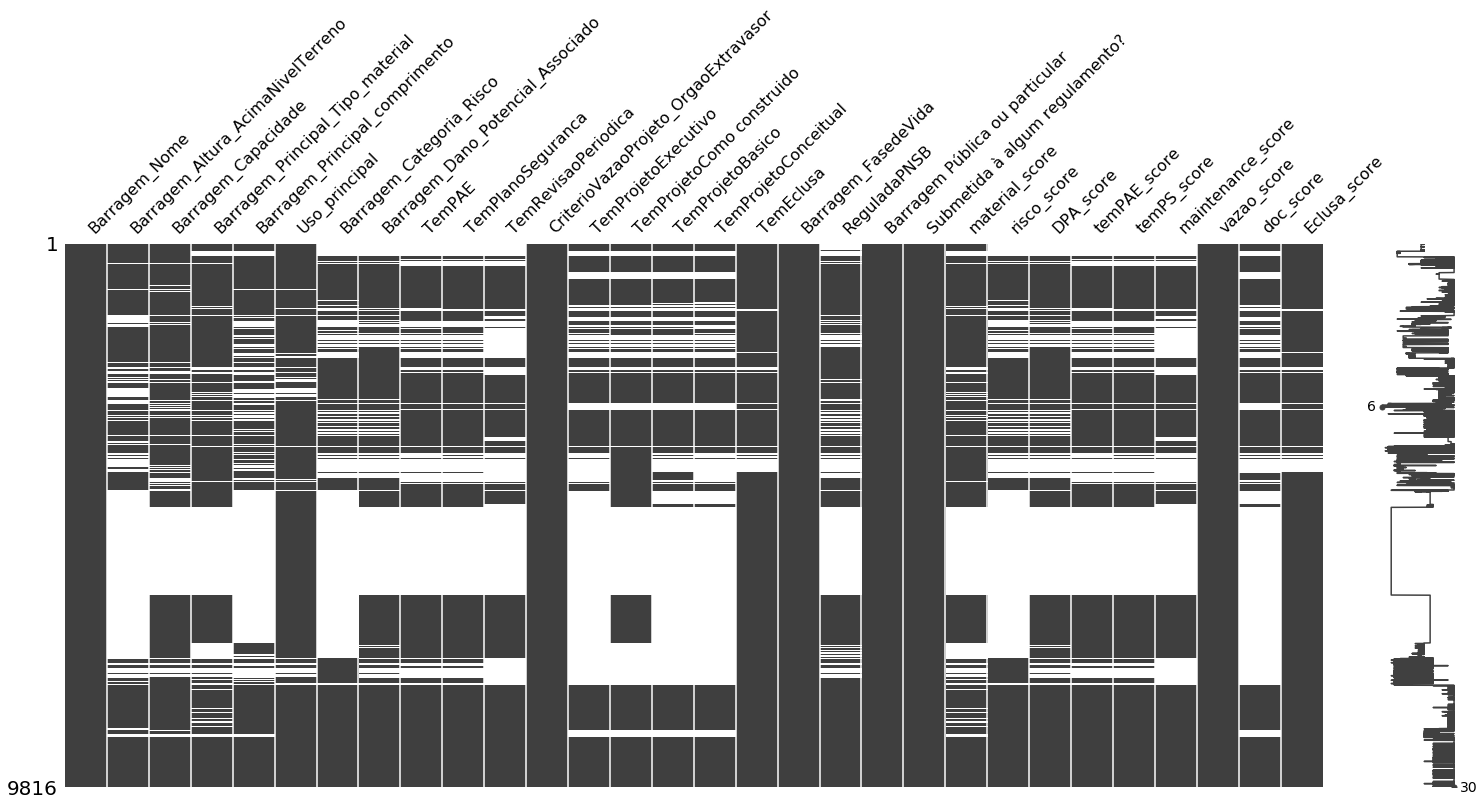

In [72]:
import missingno as msno
msno.matrix(df)

## Export cleaned dataframe 

In [73]:
df.to_csv('final.csv',index=False)

## check the amount of dams in high risk 

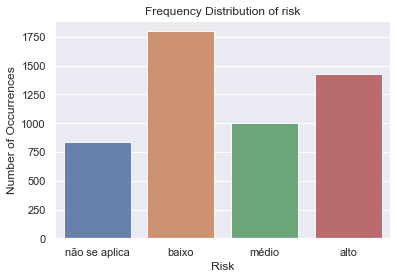

In [74]:
r_count = df['Barragem_Categoria_Risco'].value_counts()
sns.set(style="darkgrid")
sns.barplot(r_count.index, r_count.values, alpha=0.9)
plt.title('Frequency Distribution of risk')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Risk', fontsize=12)
plt.show()

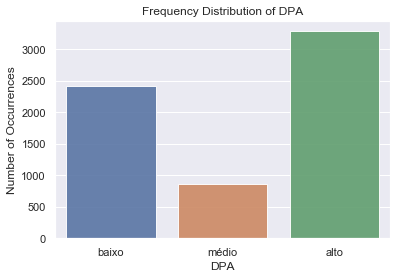

In [75]:
dpa_count = df['Barragem_Dano_Potencial_Associado'].value_counts()
sns.set(style="darkgrid")
sns.barplot(dpa_count.index, dpa_count.values, alpha=0.9)
plt.title('Frequency Distribution of DPA')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('DPA', fontsize=12)
plt.show()